# <center>Truncamiento<center>

Este notebook proporciona una explicación detallada sobre el truncamiento en modelos y simulación empresarial,
incluyendo su teoría, ejemplos prácticos en Python y la formulación matemática que lo respalda.

### Importación de Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd

# Capítulo 1: Introducción al Truncamiento

### ¿Qué es el truncamiento?

El truncamiento en Modelos y Simulación Empresarial se refiere a la **eliminación o limitación** de ciertos valores de una distribución aleatoria para restringir los resultados dentro de un rango realista o aceptable.

Por ejemplo, en un modelo de simulación de demanda de productos, una distribución normal sin restricciones puede generar valores negativos, lo cual no es posible en la realidad. Aplicando truncamiento, aseguramos que los valores generados sean coherentes con el contexto empresarial.

El truncamiento se utiliza en diversas aplicaciones como:
- Modelado de demanda de productos
- Predicción de tiempos de entrega
- Simulación de costos y presupuestos
- Control de inventarios y pronósticos de ventas


---------------------

# Capítulo 2: Formulación Matemática del Truncamiento

### Definición Matemática

Si una variable aleatoria continua $X$ sigue una distribución normal con media $μ$ y desviación estándar $σ$, se expresa como:

$X$ ~ $N(μ, σ^2)$

Donde:

* $X$ es la variable aleatoria continua
* $μ$ es la media de la distribución normal
* $σ$ es la desviación estándar de la distribución normal
* $N$ es la distribución normal

Si queremos truncar la variable en un intervalo \[$a, b$], la distribución truncada se define como:

$X$<sub>t</sub> ~ $N$<sub>\[a, b]</sub>$(μ, σ^2)$

Donde:

* $X$<sub>t</sub> es la variable aleatoria truncada.
* \[$a, b$] es el intervalo de truncamiento.
* $N$<sub>\[$a, b$]</sub> denota la distribución normal truncada en el intervalo \[$a, b$].

La función de densidad de probabilidad (PDF) de la distribución truncada está dada por:

$f$<sub>t</sub>$(x) = f(x) / (F(b) - F(a)),  a ≤ x ≤ b$

Donde:

* $f$<sub>t</sub>(x) es la PDF de la distribución normal truncada.
* $f(x)$ es la PDF de la distribución normal original.
* $F(x)$ es la función de distribución acumulada (CDF) de la distribución normal original.
* $a$ es el límite inferior del intervalo de truncamiento.
* $b$ es el límite superior del intervalo de truncamiento.

Esto garantiza que los valores de la variable aleatoria se encuentren dentro del rango especificado \[$a, b$].

---------------------

# Capítulo 3: Análisis Descriptivo y Comparaciones

### Ejemplo 1 (Truncamiento de una Distribución Normal)

Un equipo de preparadores físicos está analizando los tiempos de recuperación de los atletas después de una maratón. Se sabe que el tiempo promedio de recuperación completa es de **48 horas**, con una **desviación estándar de 12 horas**.

Sin embargo, los médicos han determinado que el tiempo mínimo de recuperación antes de volver a entrenar es de **24 horas**, y que ningún atleta tarda más de **96 horas** en recuperarse completamente

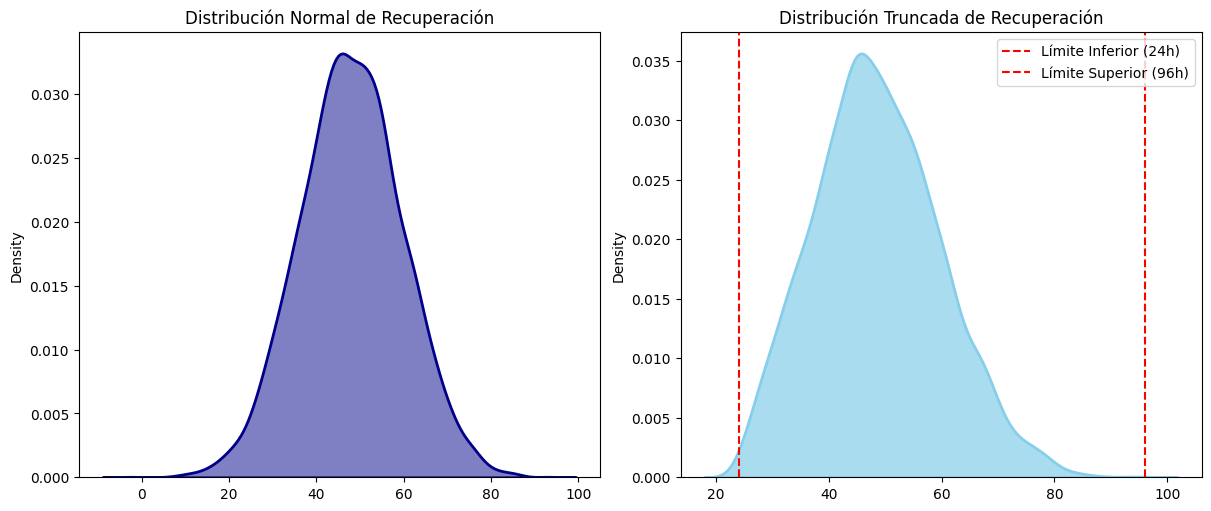

Métrica Distribución Normal Distribución Truncada
  Media               47.97                 48.60
    Std               11.79                 11.19
    Min               -2.54                 24.01
    Max               93.09                 95.80
    25%               40.11                 40.60
    50%               47.83                 47.96
    75%               55.77                 56.01


In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), layout='constrained')

mean_a = 48  # Media en horas
std_a = 12   # Desviación estándar en horas
norm_lower, norm_upper = 24, 96  # Límites de truncamiento

# Distribución Normal
norm_a = np.random.normal(loc=mean_a, scale=std_a, size=5000)
sns.kdeplot(norm_a, fill=True, color='darkblue', alpha=0.5, ax=ax[0], linewidth=2)
ax[0].set_title('Distribución Normal de Recuperación')

# Distribución Truncada
truncated_norm_a = stats.truncnorm((norm_lower - mean_a) / std_a, (norm_upper - mean_a) / std_a, loc=mean_a, scale=std_a).rvs(5000) 
sns.kdeplot(truncated_norm_a, fill=True, color='skyblue', alpha=0.7, ax=ax[1], linewidth=2)
ax[1].set_title('Distribución Truncada de Recuperación')
ax[1].axvline(norm_lower, color='red', linestyle='dashed', label='Límite Inferior (24h)')
ax[1].axvline(norm_upper, color='red', linestyle='dashed', label='Límite Superior (96h)')
ax[1].legend()

plt.show()

# Estadísticas descriptivas
stats_dict_norm = {
    "Métrica": ["Media", "Std", "Min", "Max", "25%", "50%", "75%"],
    "Distribución Normal": [np.mean(norm_a), np.std(norm_a), np.min(norm_a), np.max(norm_a), np.percentile(norm_a, 25), np.percentile(norm_a, 50), 
                            np.percentile(norm_a, 75)],
    "Distribución Truncada": [np.mean(truncated_norm_a), np.std(truncated_norm_a), np.min(truncated_norm_a), np.max(truncated_norm_a), 
                              np.percentile(truncated_norm_a, 25), np.percentile(truncated_norm_a, 50), np.percentile(truncated_norm_a, 75)]
}
df_stats_norm = pd.DataFrame(stats_dict_norm)

print(df_stats_norm.to_string(index=False, formatters={"Distribución Normal": "{:.2f}".format, "Distribución Truncada": "{:.2f}".format}))


### Ejemplo 2 (Truncamiento de una Distribución Exponencial)

Un hospital está analizando los tiempos de espera en urgencias antes de que un paciente sea atendido por un médico. Se ha observado que estos tiempos siguen una **distribución exponencial**, con un tiempo medio de espera de **5 minutos**(lo que implica un parámetro $𝜆 = 1/5$)

Sin embargo, debido a regulaciones del hospital, **ningún paciente debe esperar más de 10 minutos** antes de ser atendido. Por lo tanto, queremos modelar la distribución truncada para evaluar cómo afecta esta restricción a los tiempos de espera.

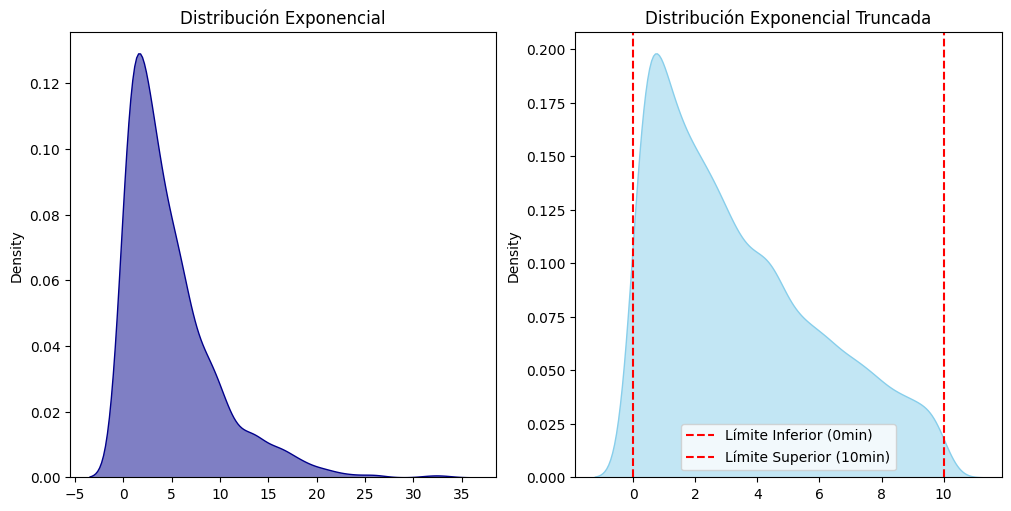

Métrica Distribución Exponencial Distribución Truncada
  Media                     4.85                  3.40
    Std                     4.65                  2.63
    Min                     0.01                  0.00
    Max                    33.08                 10.00
    25%                     1.42                  1.17
    50%                     3.41                  2.78
    75%                     6.68                  5.15


In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

lambda_a = 1/5  # Media de 5 minutos
exp_lower, exp_upper = 0.001, 10 # Límites de truncamiento

# Distribución Exponencial
exp_a = np.random.exponential(scale=1/lambda_a, size=1000)
sns.kdeplot(exp_a, color='darkblue', fill=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución Exponencial')

# Distribución Truncada
truncated_exp_a = stats.truncexpon(b=(exp_upper-exp_lower)/(1/lambda_a), loc=exp_lower, scale=1/lambda_a).rvs(10000)
sns.kdeplot(truncated_exp_a, color='skyblue', fill=True, alpha=0.5, ax=ax[1])
ax[1].set_title('Distribución Exponencial Truncada')
ax[1].axvline(exp_lower, color='red', linestyle='dashed', label='Límite Inferior (0min)')
ax[1].axvline(exp_upper, color='red', linestyle='dashed', label='Límite Superior (10min)')
ax[1].legend()

plt.show()

# Estadísticas descriptivas
stats_dict_exp = {
    "Métrica": ["Media", "Std", "Min", "Max", "25%", "50%", "75%"],
    "Distribución Exponencial": [np.mean(exp_a), np.std(exp_a), np.min(exp_a), np.max(exp_a),np.percentile(exp_a, 25), np.percentile(exp_a, 50), np.percentile(exp_a, 75)],
    "Distribución Truncada": [np.mean(truncated_exp_a), np.std(truncated_exp_a), np.min(truncated_exp_a), np.max(truncated_exp_a),np.percentile(truncated_exp_a, 25), np.percentile(truncated_exp_a, 50), np.percentile(truncated_exp_a, 75)]
}
df_stats_exp = pd.DataFrame(stats_dict_exp)
print(df_stats_exp.to_string(index=False, formatters={"Distribución Exponencial": "{:.2f}".format, "Distribución Truncada": "{:.2f}".format}))

---------------------

# Capítulo 4: Aplicaciones Empresariales

El truncamiento es una técnica esencial en la simulación empresarial, ya que permite modelar mejor las realidades del negocio. 
A continuación, se presentan algunos casos de uso:

### 1. **Simulación de Inventarios**
   - Un almacén tiene un espacio limitado para almacenar productos.
   - No se pueden tener existencias negativas ni superar la capacidad máxima.
   - Se usa truncamiento para modelar la distribución de existencias diarias.

**Ejemplo**: Una empresa de logística gestiona un almacén con capacidad limitada para el almacenamiento de productos. Cada día, la cantidad de unidades recibidas sigue una distribución de Poisson con una media de 15 productos diarios.

Sin embargo, el inventario debe mantenerse dentro de ciertos límites:
- No puede haber menos de 5 productos, ya que es el stock mínimo de seguridad.
- No puede superar los 30 productos, porque el espacio del almacén es restringido.

Para reflejar estas restricciones, se aplica truncamiento a la distribución de Poisson. Esto permite simular un inventario más realista sin valores fuera del rango permitido.

**Nota**: Para la gráfica se utiliza $histplot$ debido a que es una distribución discreta y si se implementara $kdeplot$ arrojaría un error

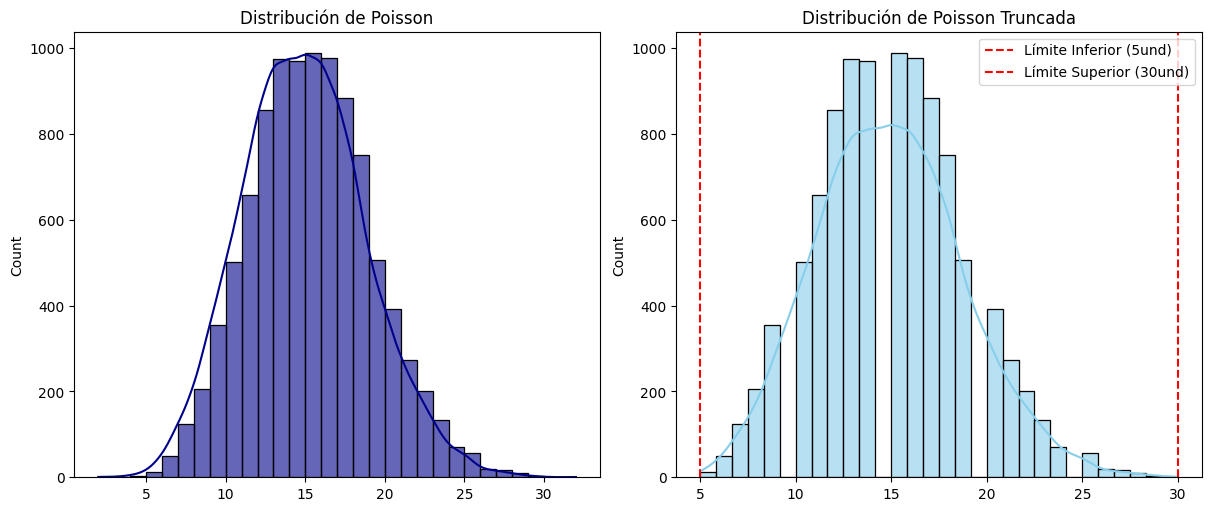

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), layout='constrained')

lambda_pos = 15   # Tasa media de productos recibidos en el almacén
pos_lower = 5     # Nivel mínimo de inventario permitido
pos_upper = 30    # Capacidad máxima del almacén

# Distribución de Poisson
poisson_inv = np.random.poisson(lam=lambda_pos, size=10000)
sns.histplot(poisson_inv, color='darkblue', alpha=0.6, bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Poisson')

# Distribución Truncada
truncated_poisson_inv = poisson_inv[(poisson_inv >= pos_lower) & (poisson_inv <= pos_upper)]
sns.histplot(truncated_poisson_inv, color='skyblue', alpha=0.6, bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribución de Poisson Truncada')
ax[1].axvline(pos_lower, color='red', linestyle='dashed', label='Límite Inferior (5und)')
ax[1].axvline(pos_upper, color='red', linestyle='dashed', label='Límite Superior (30und)')
ax[1].legend()

plt.show()


### 2. **Estimación de Costos y Presupuestos:**
   - Un proyecto tiene costos que siguen una distribución normal.
   - Los costos no pueden ser negativos ni superar un presupuesto máximo.
   - Se usa truncamiento para mantener los valores dentro del rango permitido.

**Ejemplo**: Una empresa de construcción está planificando el presupuesto para un nuevo proyecto. Basado en experiencias previas, se estima que los costos siguen una distribución triangular, donde:

- El costo mínimo esperado es $50,000 (optimista).
- El costo más probable es $80,000 (estimación central).
- El costo máximo no debe superar $120,000 (pesimista).

Sin embargo, en la realidad, los costos nunca pueden ser negativos y tampoco pueden superar el presupuesto máximo aprobado. Por esta razón, se trunca la distribución para garantizar que las simulaciones reflejen únicamente costos dentro del rango permitido.

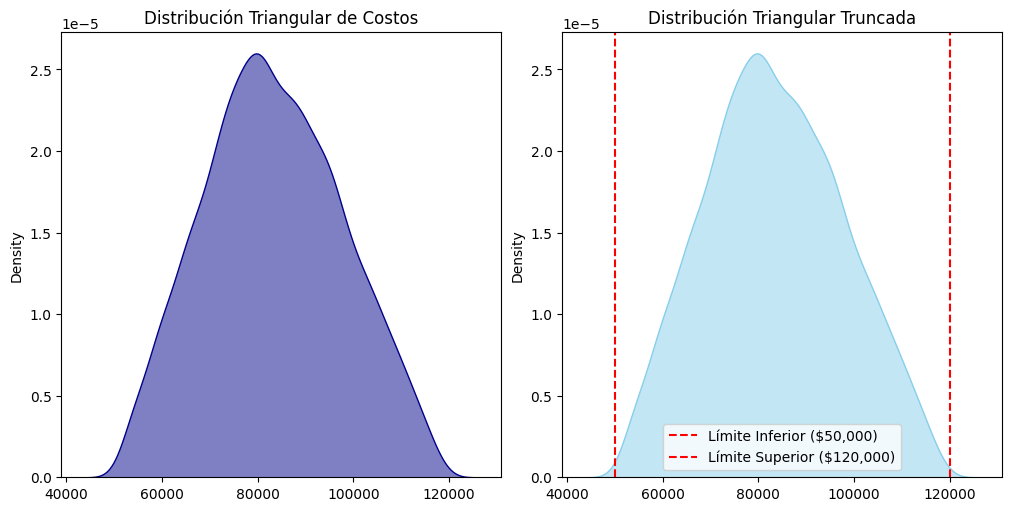

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

cost_min, cost_mode, cost_max = 50000, 80000, 120000
triang_c = (cost_mode - cost_min) / (cost_max - cost_min)

# Distribución Triangular
triang_dist = stats.triang(triang_c, loc=cost_min, scale=cost_max - cost_min).rvs(10000)
sns.kdeplot(triang_dist, color='darkblue', fill=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución Triangular de Costos')

# Distribución Truncada
truncated_triang_dist = triang_dist[(triang_dist >= cost_min) & (triang_dist <= cost_max)]
sns.kdeplot(truncated_triang_dist, color='skyblue', fill=True, alpha=0.5, ax=ax[1])
ax[1].set_title('Distribución Triangular Truncada')
ax[1].axvline(cost_min, color='red', linestyle='dashed', label='Límite Inferior ($50,000)')
ax[1].axvline(cost_max, color='red', linestyle='dashed', label='Límite Superior ($120,000)')
ax[1].legend()

plt.show()

### 3. **Simulación de Tiempos de Entrega:**
   - Los tiempos de entrega de productos siguen una distribución normal.
   - No puede haber entregas negativas ni retrasos mayores a un umbral aceptable.
   - Se aplica truncamiento para obtener tiempos de entrega realistas.

**Ejemplo**: Una empresa de logística está analizando los tiempos de entrega de sus pedidos. Con base en datos históricos, se sabe que los tiempos de entrega siguen una distribución log-normal, debido a que algunos envíos pueden experimentar retrasos inesperados, pero no pueden ser negativos.

- Tiempo de entrega medio: 3.5 días
- Desviación estándar: 1.2 días

Sin embargo, no es realista considerar tiempos de entrega extremadamente altos. Por política de la empresa, se establece que ningún pedido debería tardar menos de 1 día ni más de 8 días en ser entregado.

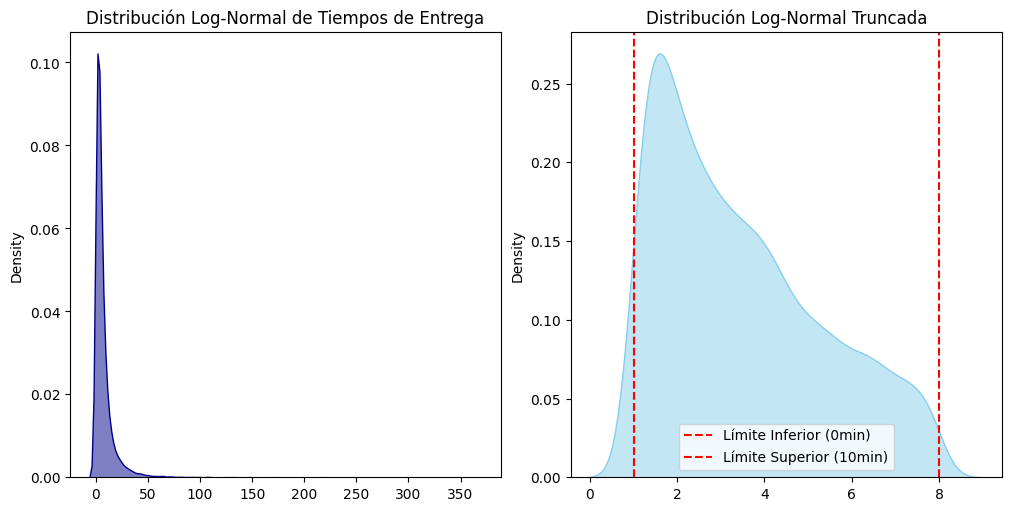

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

mu, sigma = np.log(3.5), 1.2

# Distribución Log-Normal
lognorm_dist = np.random.lognormal(mean=mu, sigma=sigma, size=10000)
sns.kdeplot(lognorm_dist, color='darkblue', fill=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución Log-Normal de Tiempos de Entrega')

# Distribución Truncada
delivery_min, delivery_max = 1, 8
truncated_lognorm_dist = lognorm_dist[(lognorm_dist >= delivery_min) & (lognorm_dist <= delivery_max)]
sns.kdeplot(truncated_lognorm_dist, color='skyblue', fill=True, alpha=0.5, ax=ax[1])
ax[1].set_title('Distribución Log-Normal Truncada')
ax[1].axvline(delivery_min, color='red', linestyle='dashed', label='Límite Inferior (0min)')
ax[1].axvline(delivery_max, color='red', linestyle='dashed', label='Límite Superior (10min)')
ax[1].legend()

plt.show()

### 4. **Pronósticos de Ventas:**
   - Se proyectan ventas futuras con una distribución estadística.
   - Se limita la cantidad de ventas dentro de valores mínimos y máximos realistas.
   - Se utiliza truncamiento para generar pronósticos más precisos.

**Ejemplo**: Una empresa de retail desea estimar la cantidad de unidades vendidas de un producto en un período determinado. A partir de datos históricos, se sabe que la demanda sigue una distribución de Poisson, ya que las ventas ocurren como eventos discretos y aleatorios a lo largo del tiempo.

- Promedio de ventas diarias: 50 unidades

Sin embargo, en la práctica:

- No se pueden vender menos de 35 unidades debido a la demanda mínima asegurada.
- No se pueden vender más de 65 unidades debido a restricciones de inventario.

**Nota**: Para la gráfica se utiliza $histplot$ debido a que es una distribución discreta y si se implementara $kdeplot$ arrojaría un error

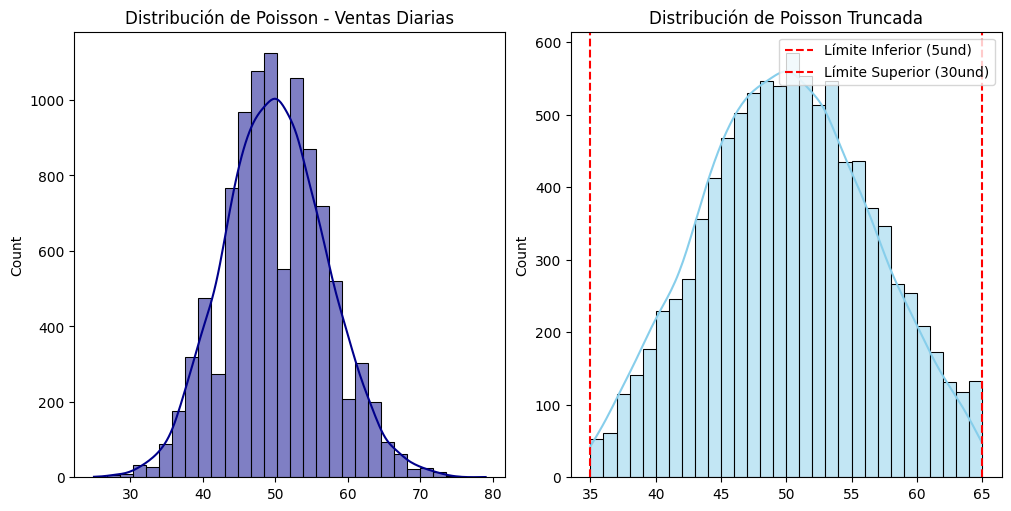

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), layout='constrained')

lambda_sales = 50

# Distribución de Poisson
poisson_sales = np.random.poisson(lam=lambda_sales, size=10000)
sns.histplot(poisson_sales, bins=30, color='darkblue', kde=True, alpha=0.5, ax=ax[0])
ax[0].set_title('Distribución de Poisson - Ventas Diarias')

# Distribución Truncada
sales_min, sales_max = 35, 65
truncated_poisson_sales = poisson_sales[(poisson_sales >= sales_min) & (poisson_sales <= sales_max)]
sns.histplot(truncated_poisson_sales, bins=30, color='skyblue', kde=True, alpha=0.5, ax=ax[1])
ax[1].set_title('Distribución de Poisson Truncada')
ax[1].axvline(sales_min, color='red', linestyle='dashed', label='Límite Inferior (5und)')
ax[1].axvline(sales_max, color='red', linestyle='dashed', label='Límite Superior (30und)')
ax[1].legend()

plt.show()

---------------------

# Capítulo 5: Ejercicios

Una póliza de seguros tiene dos clases básicas de asegurados, la clase A y la clase B; hay 38 asegurados de la clase A y 10 de la clase B.  El número de siniestros de los miembros de la clase A sigue una distribución Binomial Negativa con parámetros (5, 0,25), y el número de siniestros de los miembros de la clase B sigue una distribución geométrica con parámetro 0,25. El tamaño de una reclamación de los miembros de la clase A sigue una distribución exponencial con una media de 40.000 $, y el tamaño de la reclamación de los miembros de la clase B se distribuye con una distribución Pearson 5 con parámetros (10, 2000000). En este caso, queremos caracterizar la distribución de los siniestros totales. 